### Códigos de import e gráficos de Março, Abril, Maio, Junho e Dezembro

Escreva o mês desejado: dezembro
DEZEMBRO


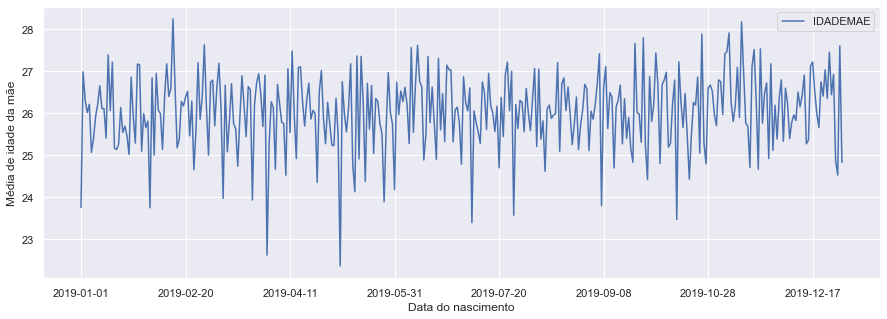

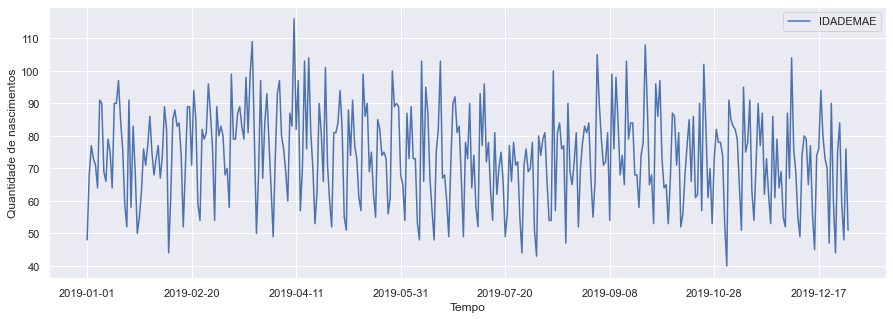

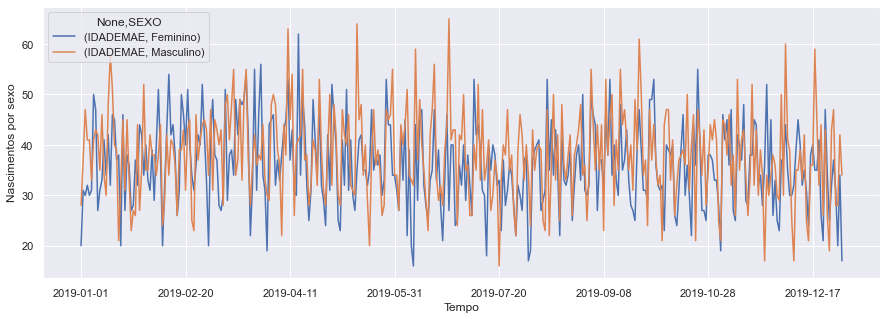

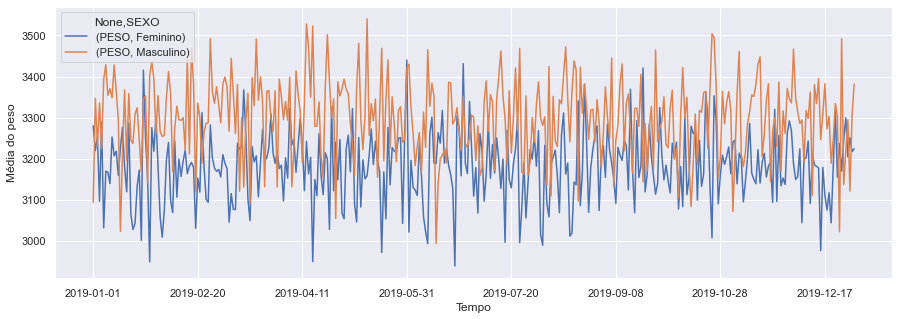

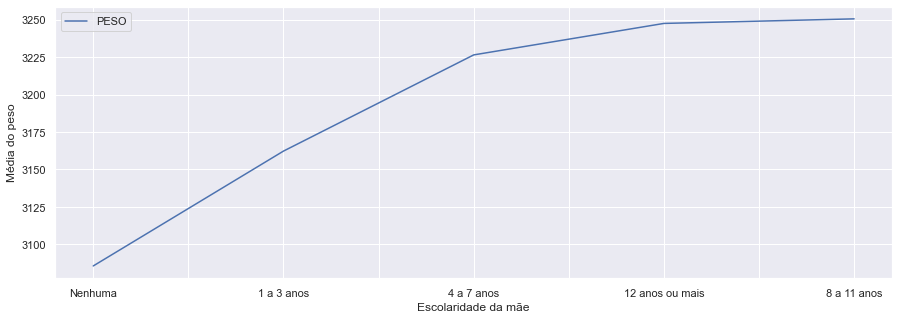

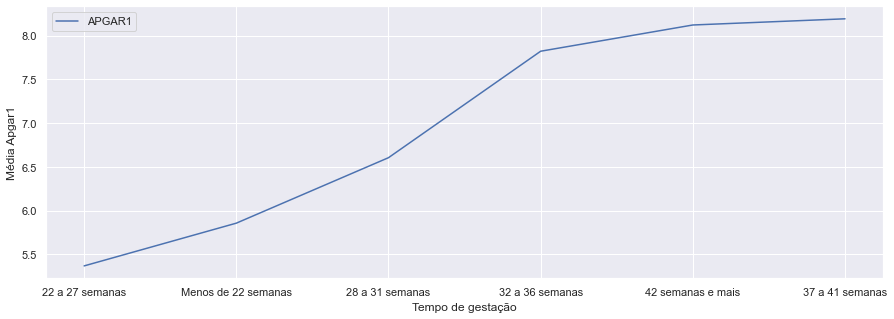

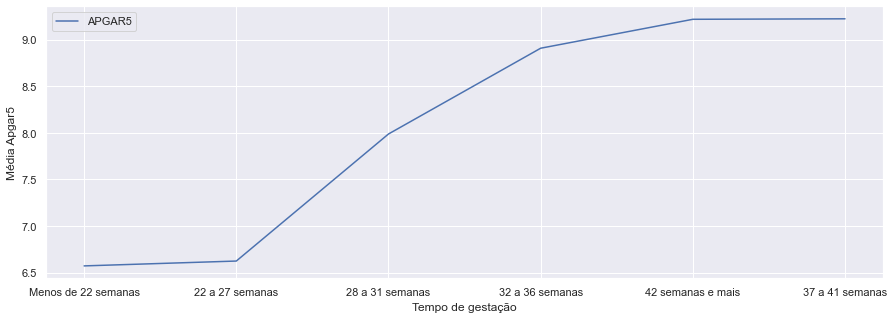

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme()

def escolha_mes():
    global sinasc
    
    mes = input('Escreva o mês desejado: ')
    mes = mes.upper()
    print(mes)
    
    if mes == 'JANEIRO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_JAN.csv')
        
    elif mes == 'FEVEREIRO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_FEV.csv')
        
    elif mes == 'MARÇO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_MAR.csv')
        
    elif mes == 'ABRIL':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_ABR.csv')
        
    elif mes == 'MAIO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_MAI.csv')   
        
    elif mes == 'JUNHO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_JUN.csv')  
        
    elif mes == 'JULHO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_JUL.csv')
    
    elif mes == 'AGOSTO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_AGO.csv')
    
    elif mes == 'SETEMBRO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_SET.csv')
    
    elif mes == 'OUTUBRO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_OUT.csv')
        
    elif mes == 'NOVEMBRO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_NOV.csv')
        
    elif mes == 'DEZEMBRO':
        sinasc = pd.read_csv('./input/SINASC_RO_2019_DEZ.csv')  
        
        
    else:
        print('Mês não enontrado, tente novamente.')
        
    return sinasc
            


def graficos_pivot(df, value, index, func, ylabel, xlabel, opcao='nada'):
    
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15,5])
    
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15,5])
    
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15,5])
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    max_data=sinasc.DTNASC.max()[:7]
    os.makedirs('./output/figs/'+max_data,exist_ok=True)
    
    plt.savefig('./output/figs/'+max_data+'/'+xlabel+'-'+ylabel+'.png')
    
    
    return 

escolha_mes()

#Média de idade da mãe por data
graficos_pivot(sinasc, 'IDADEMAE', 'DTNASC', 'mean', 'Média de idade da mãe', 'Data do nascimento',)


#Quantidade de nascidos por data
graficos_pivot(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'Quantidade de nascimentos', 'Tempo')


#Quantidade de nascidos de cada sexo por data
graficos_pivot(sinasc, 'IDADEMAE', ['DTNASC','SEXO'], 'count','Nascimentos por sexo', 'Tempo','unstack')


#Média do peso de cada sexo por data
graficos_pivot(sinasc, 'PESO', ['DTNASC','SEXO'], 'mean', 'Média do peso', 'Tempo','unstack')


#Média de peso por escolaridade da mãe
graficos_pivot(sinasc, 'PESO', ['ESCMAE'], 'mean', 'Média do peso', 'Escolaridade da mãe', 'sort')


#Apgar1 médio por tempo de gestação 
graficos_pivot(sinasc, 'APGAR1', 'GESTACAO','mean', 'Média Apgar1', 'Tempo de gestação', 'sort')


#Apgar5 médio por tempo de gestação 
graficos_pivot(sinasc, 'APGAR5', 'GESTACAO','mean', 'Média Apgar5', 'Tempo de gestação', 'sort')